Build Simple Mushroom Classifier

In [1]:
from pathlib import Path
from fastai.vision.all import *

Load Images for 11 Taxa with 100 Images Each
Uncomment second line to use 100 Taxa with 100 Images Each

In [24]:
# MO_URL = "https://mushroomobserver.org/mo_11_100.tgz"
MO_URL = "https://images.mushroomobserver.org/mo_100_100.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)
def label_func(x):
    return x.parent.name

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = vision_learner(dls, resnet34, metrics=error_rate)

Run Training

In [25]:
print(datetime.now())
learn.fine_tune(10)
print(datetime.now())

2022-07-20 08:22:50.339391


2022-07-20 08:45:51.089016


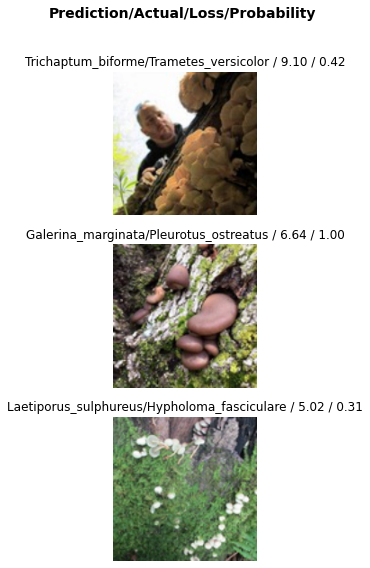

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=15)

Save the Model

In [28]:
# learn.save("sample-11x100-model")
learn.save("sample-100x100-model")

Path('/Users/nathan/.fastai/data/mo_11_100/models/sample-11x100-model.pth')

Reload and Verify the Model

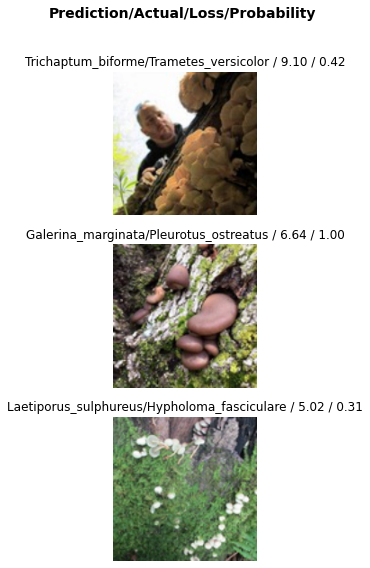

In [29]:
learn.load("sample-100x100-model")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=15)

In [26]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp /root/.fastai/data/mo_100_100/models/sample-100x100-model.pth /content/drive/MyDrive

ModuleNotFoundError: No module named 'google'

In [32]:
import os

download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
os.listdir("tmp")
path = Path("tmp", os.listdir("tmp")[0])
learn.predict(path)